# Data Transformation :

Normally distributed data is needed to use a number of statistical analysis tools, such as individuals control charts, Cp/Cpk analysis, t-tests and analysis of variance (ANOVA).

Machine learning algorithms like Linear Regression and Gaussian Naive Bayes assume the numerical variables have a Gaussian probability distribution.

Your data may not have a Gaussian distribution and instead may have a Gaussian-like distribution (e.g. nearly Gaussian but with outliers or a skew) or a totally different distribution (e.g. exponential).

When data is not normally distributed, the cause for non-normality should be determined and appropriate remedial actions should be taken.

As such, you may be able to achieve better performance when numerical variables have a Gaussian probability distribution on a wide range of machine learning algorithms by transforming input and/or output variables to have a Gaussian or more-Gaussian distribution.

Data transformation is one of these remedial actions that may help to make data normal. A common reason for transformations is to remove distributional skewness. An un-skewed distribution is one that is roughly symmetric. This means that the probability of falling on either side of the distribution’s mean is roughly equal.

Transforming data means performing the same mathematical operation on each piece of original data.

Some transformation examples from daily life are currency exchange rates (e.g., U.S. dollar into Euros) and converting degree Celsius into degree Fahrenheit. These two transformations are called linear transformations because the original data is simply multiplied or divided by a specific coefficient or a constant is subtracted or added. But these linear transformations do not change the shape of the data distribution and, therefore, do not help to make data look more normal.

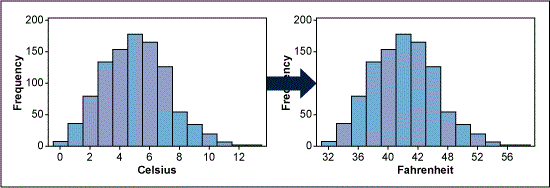

## 1. Make Data More Gaussian

## Power Transformation

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

#### demonstration of the power transform on data with a skew

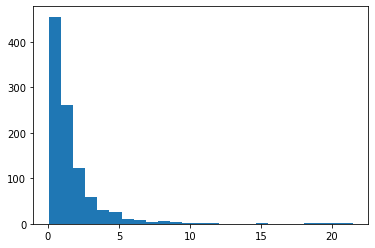

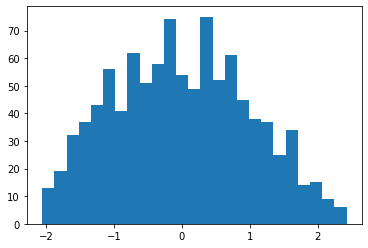

In [6]:
# generate gaussian data sample with 1,000 random Gaussian values
data = np.random.randn(1000)

# add a skew to the data distribution
data = np.exp(data)

# histogram of the raw data with a skew
plt.hist(data, bins=25)
plt.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# histogram of the transformed data
plt.hist(data_trans, bins=25)
plt.show()

#### Sonar Dataset

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

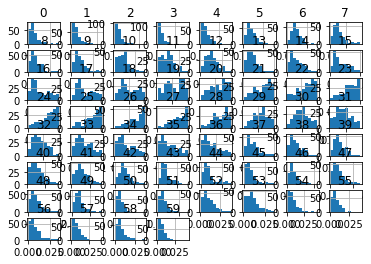

In [8]:
'''
The sonar dataset is a standard machine learning dataset for binary classification.
The dataset describes radar returns of rocks or simulated mines.
It involves 60 real-valued inputs and a 2-class target variable.
There are 208 examples in the dataset and the classes are reasonably balanced.
A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using
repeated stratified 10-fold cross-validation.
Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross-validation.
'''

# load and summarize the sonar dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable
print(dataset.describe())

# histograms of the variables
dataset.hist()
plt.show()

In [7]:
'''
If we ignore the clutter of the plots and focus on the histograms themselves,
we can see that many variables have a skewed distribution.

The dataset provides a good candidate for using a power transform to make the variables more-Gaussian.

Next, let’s fit and evaluate a machine learning model on the raw dataset.

We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using 
repeated stratified k-fold cross-validation. The complete example is listed below.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure,
or differences in numerical precision. Consider running the example a few times and compare the average outcome.

We can see that the model achieved a mean classification accuracy of about 79.7 percent,
showing that it has skill (better than 53.4 percent) and is in the ball-park of good performance (88 percent).
'''

# evaluate knn on the raw sonar dataset
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.797 (0.073)


# Box-Cox Power Transformation:

The statisticians George Box and David Cox developed a procedure to identify an appropriate exponent (Lambda = l) to use to transform data into a “normal shape”.

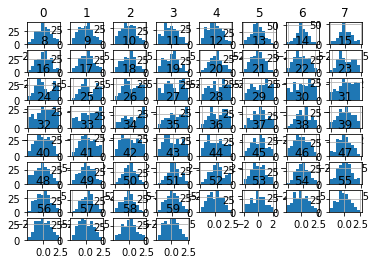

'\nWe can see that the shape of the histograms for each variable looks more Gaussian than the raw data.\nLet’s evaluate the same KNN model as the previous section, but in this case on a Box-Cox transform of the scaled dataset.\n'

In [2]:
'''
We can see that the shape of the histograms for each variable looks more Gaussian than the raw data.
'''
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)

# visualize a box-cox transform of the sonar dataset
# retrieve just the numeric input values
data = dataset.values[:, :-1]

# # Will throw ValueError
# pt = PowerTransformer(method='box-cox')
# data = pt.fit_transform(data)

# to make the raw data strictly positive else ValueError will occur at box-cox
scaler = MinMaxScaler(feature_range=(1, 2))

# perform a box-cox transform of the dataset
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
dataset.hist()
plt.show()

In [5]:
'''
Let’s evaluate the same KNN model as the previous section, but in this case on a Box-Cox transform of the scaled dataset.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or 
differences in numerical precision. Consider running the example a few times and compare the average outcome.

Running the example, we can see that the Box-Cox transform results in a lift in performance from
79.7 percent accuracy without the transform to about 81.1 percent with the transform.
'''

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)

# evaluate knn on the box-cox sonar dataset
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.811 (0.085)


# Yeo-Johnson Transformation

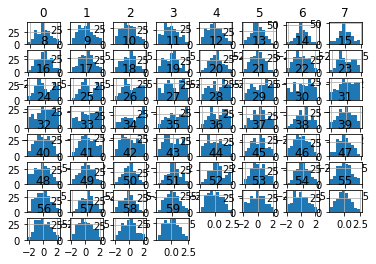

In [9]:
'''
Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.
It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

We can apply the transform by defining a PowerTransform object and setting the “method” argument to “yeo-johnson” (the default).
'''
# visualize a yeo-johnson transform of the sonar dataset
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = pd.DataFrame(data)

# histograms of the variables
dataset.hist()
plt.show()

In [ ]:
# evaluate knn on the yeo-johnson sonar dataset
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))